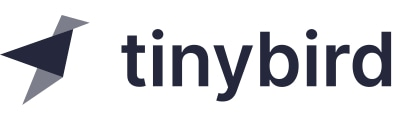
#Principles of Real-Time Analytics Course

`Copy to Drive` (see above) the Notebook.

In [1]:
#@title Mount your Google Drive to save and use local files
from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)

% cd "/content/gdrive/My Drive/Colab Notebooks/Tinybird"

Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/Tinybird


In [2]:
#@title Install Tinybird CLI and your token
!pip install tinybird-cli -q -U

import os

if not os.path.isdir('./datasources'):
  !tb init

if not os.path.isfile('.tinyb'): 
  !tb auth

     |████████████████████████████████| 72 kB 1.0 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 
     |████████████████████████████████| 86 kB 4.0 MB/s 
     |████████████████████████████████| 46 kB 3.5 MB/s 
     |████████████████████████████████| 81 kB 8.2 MB/s 
     |████████████████████████████████| 61 kB 7.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.25.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
#@title Helper function
def write_text_to_file(filename, text):
  with open(filename, 'w') as f: f.write(text)

## Notebook Purpose

|Create         |
| ----------------- |
| recipes.datasource|


#ClickHouse Recipes Dataset

https://clickhouse.tech/docs/en/getting-started/example-datasets/recipes/

Here we create a datasource of recipes using the TSV creating by selecting all from the ClickHouse table of recipes.

`% ClickHouse/build/programs/clickhouse-client --query "SELECT * FROM recipes" > datasources/fixtures/recipes.tsv`

In [4]:
filename = "datasources/recipes.datasource"
text = '''
SCHEMA >
    `title` String,
    `ingredients` Array(String),
    `directions` Array(String),
    `link` String,
    `source` LowCardinality(String),
    `NER` Array(String)
'''

write_text_to_file(filename, text)

In [5]:
!tb push datasources/recipes.datasource

** Processing datasources/recipes.datasource
** Building dependencies
** Running recipes 
** 'recipes' created
** Not pushing fixtures


In [6]:
!tb datasource append recipes "datasources/fixtures/recipes.tsv"

** 🥚 starting import process
** 🐥 done
** Total rows in recipes: 2231141
** Data appended to Data Source 'recipes' successfully!
** Data pushed to recipes


In [7]:
!tb sql --stats "SELECT * FROM recipes LIMIT 1"

** Query took 0.000821441 seconds
** Rows read: 1
** Bytes read: 1.33 KB
--------------------------------------------------------------------------------
title: oatmeal apple crisp Recipe adrndack
ingredients: ['5 apples; peeled, cored and cubed', '1/8 teaspoon allspice', '1/8 teaspoon cloves', '1/8 teaspoon nutmeg, freshly ground', '1 tablespoon honey', '1/4 cup butter or margarine; chilled and cut into pieces', '1/2 cup flour', '1/2 cup old fashioned oats', '1/2 cup brown sugar', '1/2 teaspoon cinnamon', '1 teaspoon vanilla extract']
directions: ['preheat oven to 375 degrees fahrenhiet.', 'grease an 8x8 baking dish.', 'combine brown sugar, flour, oats, cinnamon and vanilla extract.', 'add butter.', 'with a fork, mash together until the mixture forms moist clumps.', 'keep chilled while preparing apples.', 'in a medium bowl combine apples, allspice, cloves, nutmeg and honey.', 'toss well to coat.', 'place apples in baking dish.', 'sprinkle topping over apples.', 'bake until filling bub

In [8]:
!tb sql --rows_limit 1 --stats "SELECT * FROM recipes"

** Query took 0.001772399 seconds
** Rows read: 18
** Bytes read: 17.27 KB
--------------------------------------------------------------------------------
title: zebra cake
ingredients: ['1 cup sugar', '2 cup flour', '1 cup oil veg', '1 tsp vanila', '1 cup milk', '3 large eggs', '4 tbsp cocoa', '1 tbsp baking powder']
directions: ['preheat oven on 200', 'in a large bowl beat egg and sugar with elec beater till smooth.', 'then add oil add cont beating.', 'add cup of milk and beat', 'in a seperate bowl sift flour,b.powder.add these dry ingre in egg mixture and fold by hand.', 'then seperate mixture in2 portion and in 1 portion add cocoa and mix vell', 'one portion is brown and one is white in colour.then in a baking pan pour 1 full spoon white in the centre then pour brown part in the centre doing this until ur mixture finish then bake for 25 min']
link: cookpad.com/us/recipes/335376-zebra-cake
source: Recipes1M
NER: ['sugar', 'flour', 'oil veg', 'vanila', 'milk', 'eggs', 'cocoa', 'baki

In the Tinybird UI:

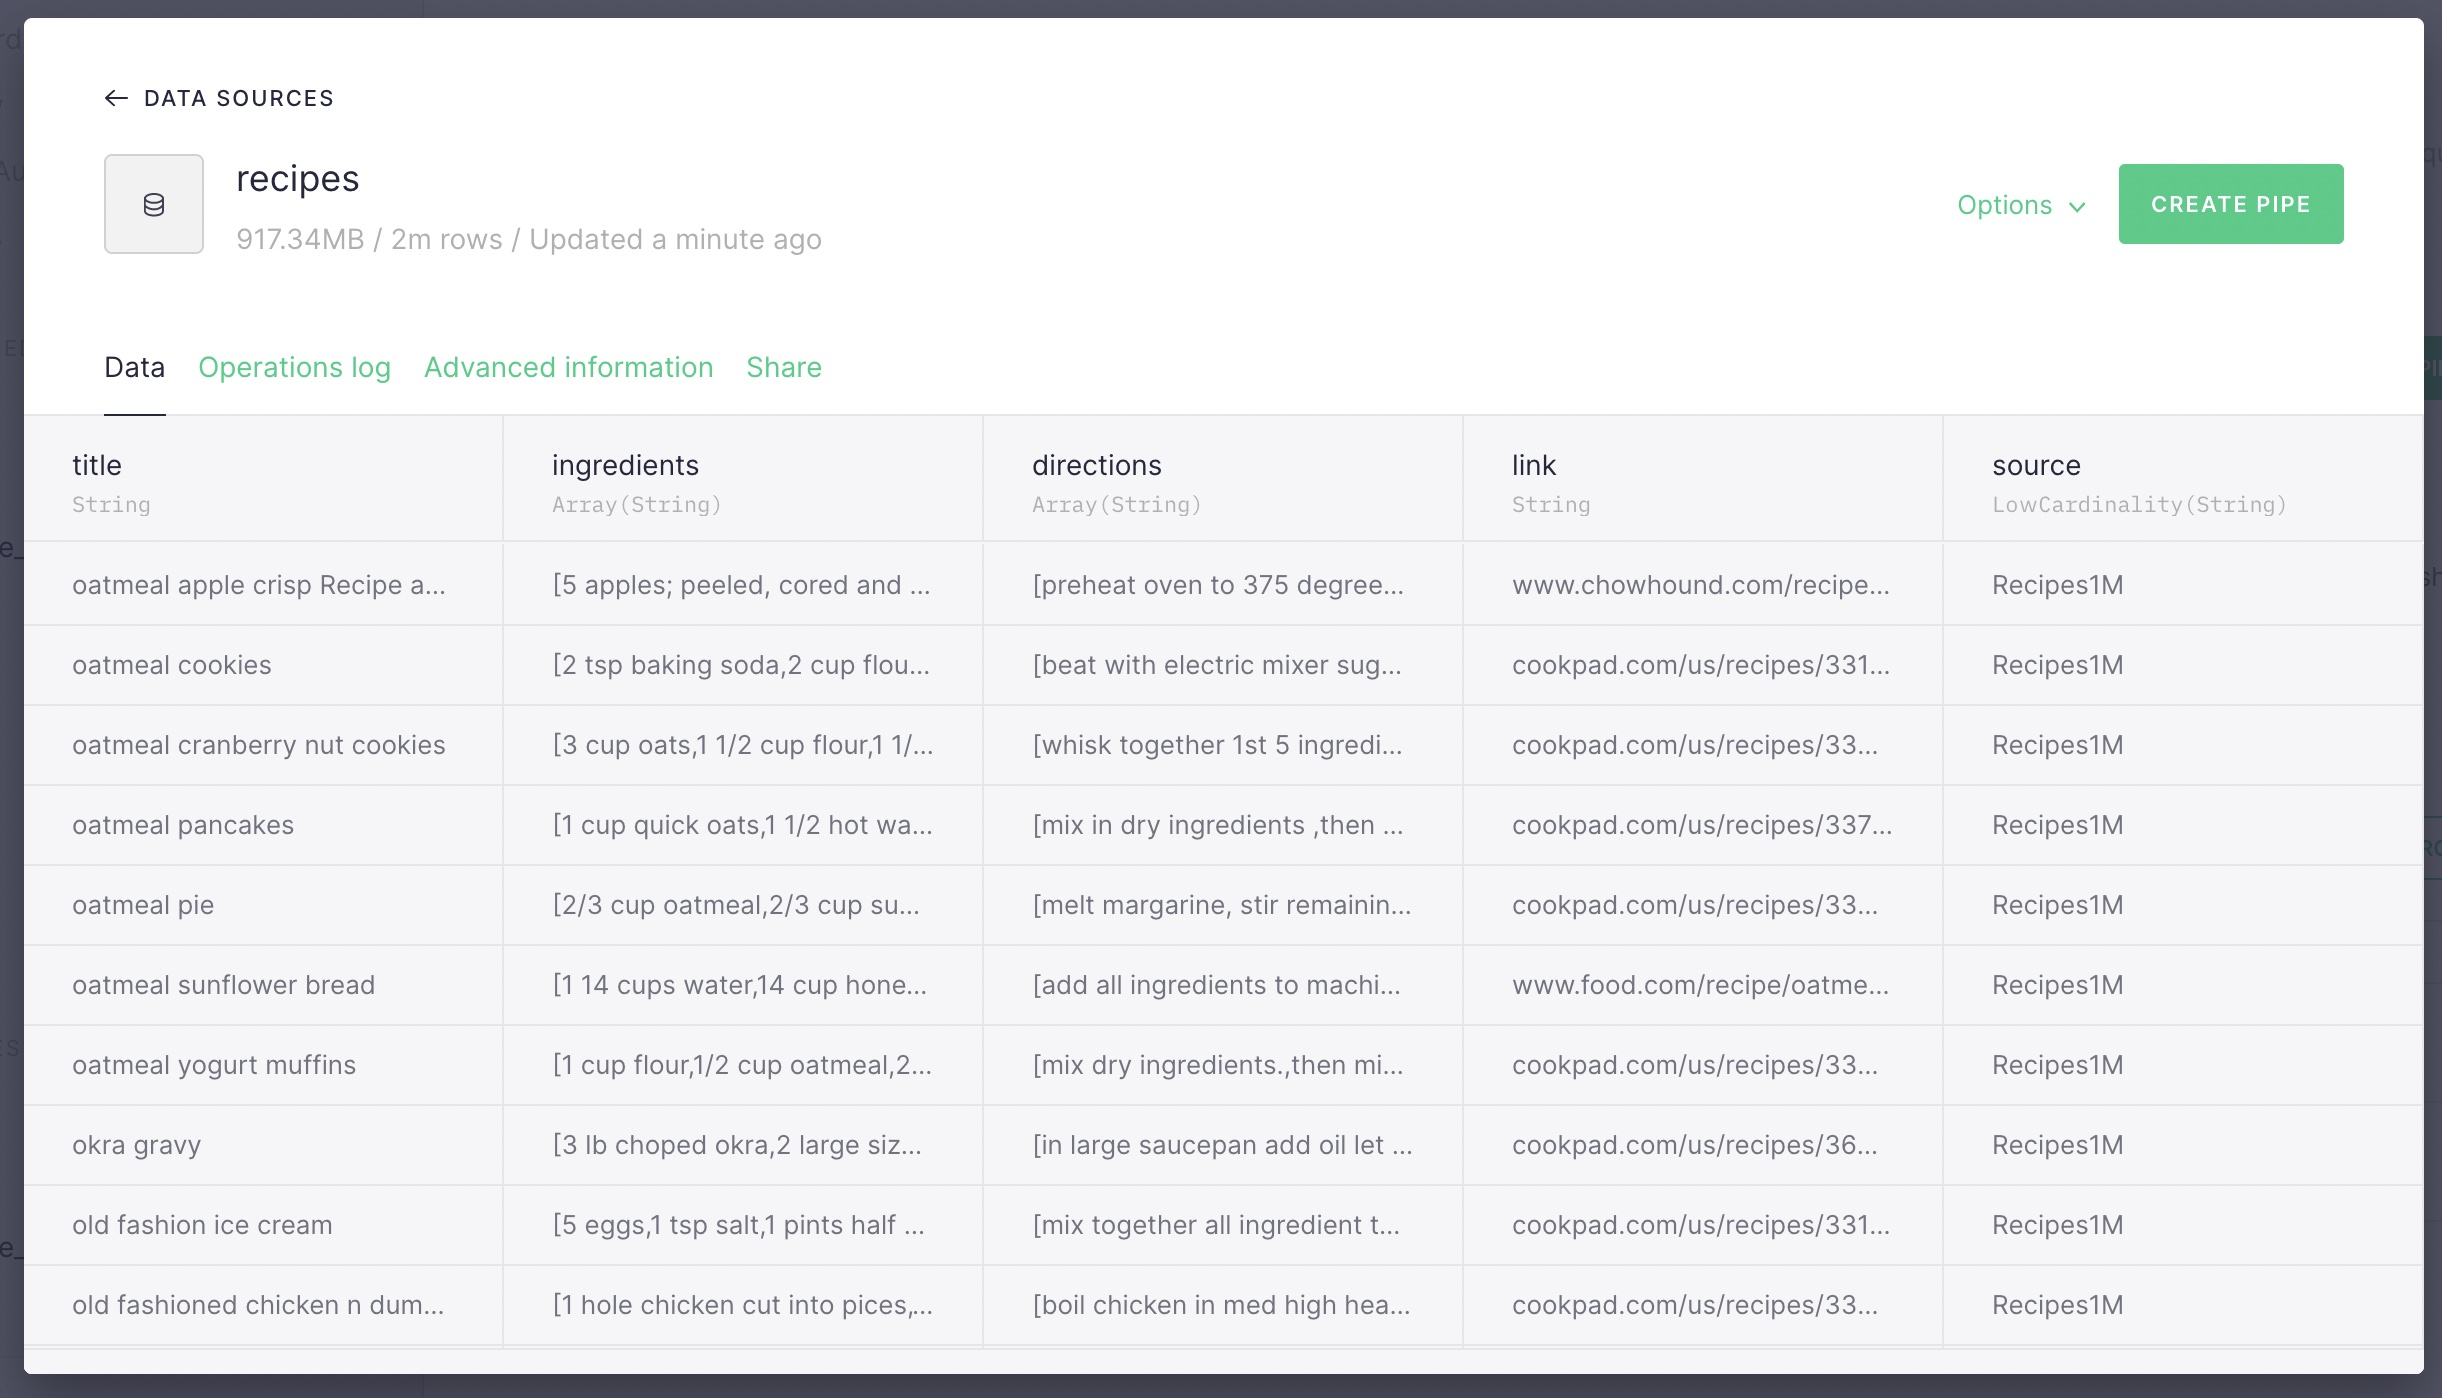